# Lab 4: Logistic Regression

In this assignment, we will learn the Logistic Regression model.

First, please study the given example, which uses the logistic regression model for the breast cancer classification task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model.

Based on the given example, your task is to use the logistic regression model to predict the presence of heart disease.

## 1. Example

### 1.1 Load the breast cancer data

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

X, y = datasets.load_breast_cancer(return_X_y=True)
print("#samples: {}, #features: {}".format(X.shape[0], X.shape[1]))

#samples: 569, #features: 30


### 1.2 Split the data into two subsets and normalize the features of samples


In [2]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.12, 
                                                            random_state=0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 500, test: 69


### 1.3 Train the logistic regression model and select the hyperparameter with cross-validation


In [3]:
# here we use 5-fold cross-validation
folds = 5

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 5 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [0.1, 0.5, 1.0, 5.0, 10.0]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 5-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs')
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        

[[380 468 145   2 282 103 148 312 130 411 168 204 113 132 418 270 351 157
  451 339 288 277 354  48 318 303 314 234  95 304 271 434 173 357 495 133
  431  39 490 310 317 471  23 426 224 286  20 365 255 216 405  79 228 445
  189 184 243 358 276 218 488  60 438 159 167 349  89 121 333  51   9 482
  152 416 379 306 111 185 340 489 475  93  84 376 291 158 250 323 406 460
   50 433 372  66 108 465  71 298 369 437]
 [211  11 110 142  28  59 163  38  24 205 440 140 177 252 235 245 242  25
   21 217 160 231  77 151  54 345 280 257 456 308 331  58 360 179 464 388
  129 285 347  56 387 169  36 138 319 296 246 122  33 127 109 363 183 196
  422  86 400 297 346 116  63  88 477 144 112 362 399 334  62 353 146 373
   27  76 260 150 210 195 290  82 154 432 320 361  75  17  94 238 143 469
   67 225 391 106  15  97  46  49 192 226]
 [114 302 356  91  80 107 329 209 384 409  13 176 299 483 295 491 332 292
  153 202 268   1 417 313 375 128 352  57 408 254 382 390 377 328 213 182
   65   7 315 101 187 126 

### 1.4 Evaluate the learned model


In [4]:
# retrain the model
clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 1.000, recall: 1.000, precision: 1.000, f1: 1.000,


## 2. Task
The task is to predict whether a person has the heart disease.

### 2.1 Preprocess the raw data
- Check whether there are missing values

- Check whether theare are cateogrical features

- Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from random import shuffle

df = pd.read_csv('https://raw.githubusercontent.com/cisdatasciencetu/CIS3715_DataScience_2023/main/Lab04/heart.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Check whether there are missing values
print(df.isnull().sum())
print("\n\033[1mThere are no missing values")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values


In [7]:
# Check whether theare are cateogrical features
print(df.info())
print("\n\033[1mThere are no categorical features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

There are no categorical features



The dataset is balanced



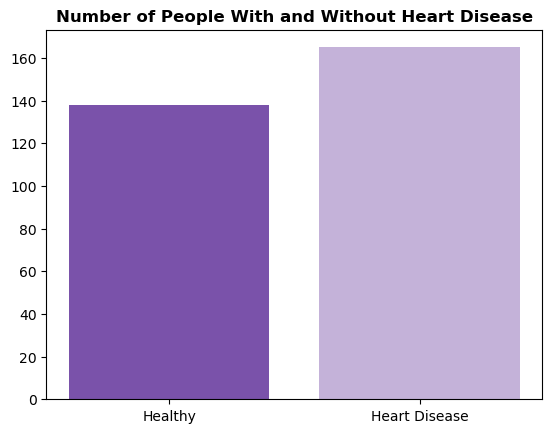

In [8]:
# Check whether this dataset is balanced or not (use the bar plot to visualize the number of positive and negative samples)
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values, color = ['#c4b2d9','#7a52aa'])
plt.xticks([0,1],['Healthy','Heart Disease'])
plt.title('Number of People With and Without Heart Disease', fontweight='heavy')
print('\n\033[1mThe dataset is balanced\n')

### 2.2 Split the data into two subsets and normalize the features of samples

In [9]:
# Split the dataset into the train_val set and testing setheart_data = df.drop('target', axis=1).values
heart_data = df.drop('target', axis=1).values
heart_disease = df['target'].values
X_train_val, X_test, y_train_val, y_test = train_test_split(heart_data, heart_disease, 
                                                            test_size = 0.14, 
                                                            random_state = 0)
print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

train_val: 260, test: 43


In [10]:
# Normalize features
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

### 2.3 Train the logistic regression model and select the hyperparameter with cross-validation
- Use the 10-fold cross-validation to select the hyperparameter 𝛌
- Search 𝛌 from {10⁻⁵, 10⁻⁴, 10⁻³, 10⁻², 10⁻¹, 1, 10, 20, 50, 100}


In [17]:
folds = 10

num_train_val = X_train_val.shape[0]

index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)
print("\n")

regularization_coefficient = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1)
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1)
        
        
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
        
        
        clf = LogisticRegression(max_iter=10000, penalty='l2', C=reg, solver='lbfgs')
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
    
    cur_acc = sum_acc / folds
    
    print("reg_coeff: {}, acc: {:.3f}".format(1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
        
print("\n\033[1mThe hightest accuracy was " + str(best_acc))
print('\033[1mThe lambda with the highest accuracy was ' + str(best_reg))


[[ 48 180 218 141 109  84 103 102 123 125 213 209 184 182 197  51 147 161
  242  34 228 191 208 183 225 139]
 [205  38   7  69 130 201 235 104 219  44 152  45 193 134 248 117 167   0
  211 110  46  64 187  22 175   5]
 [203  11 195   8 151 173 252 163 237 185  82  76  26 199  58 176  96  81
   28 164 155  99  47 126 106   6]
 [ 72  91 144  37  55  40 207 238 230  74 214  12  10 146  98 229  15 107
  226 138 198  54 204  17 157  87]
 [ 56  13 150 206 233  93 113  75 153 112 186 143  90 129 194  97 217 162
  165  49 236  30 170 156 234 120]
 [154 178  80 116 221 172  43  73 250  83 227 202 137 223 160  32  31  86
  240 105  67  19 128 255  23   4]
 [114 200  66  77 247 215  41 145  33  39  88  52 140   2 135 192  50 100
  121  25 241  14 231   9 124 258]
 [232  53 158 119  85  94 220 101 132 166 133 254 246  20  71 181 249 179
  239   3  79 131 212 243  92  95]
 [ 65 174   1 251  61  24  78 245 196  68  21 253  62  57  63  35 142 210
   59 136 149 115  36  18 224 169]
 [222 216  89 190 2

### 2.4 Evaluate the learned model
- Report the prediction accuracy, recall, precision, and F1 score.

- Use the bar plot to visulaize the elements of the learned model parameter vector w. Some elements have larger absolute values, while the others do not. Try to explain this phenomenon.



In [12]:
# Retrain the model
clf = LogisticRegression(max_iter=10000, penalty='l2', C=best_reg, solver='lbfgs')
clf.fit(X_train_val, y_train_val)

# Evaluate the model on the testing set
y_test_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)


print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))

accuracy: 0.837, recall: 0.857, precision: 0.818, f1: 0.837,


Text(0.5, 1.0, 'Learned Model Parameters')

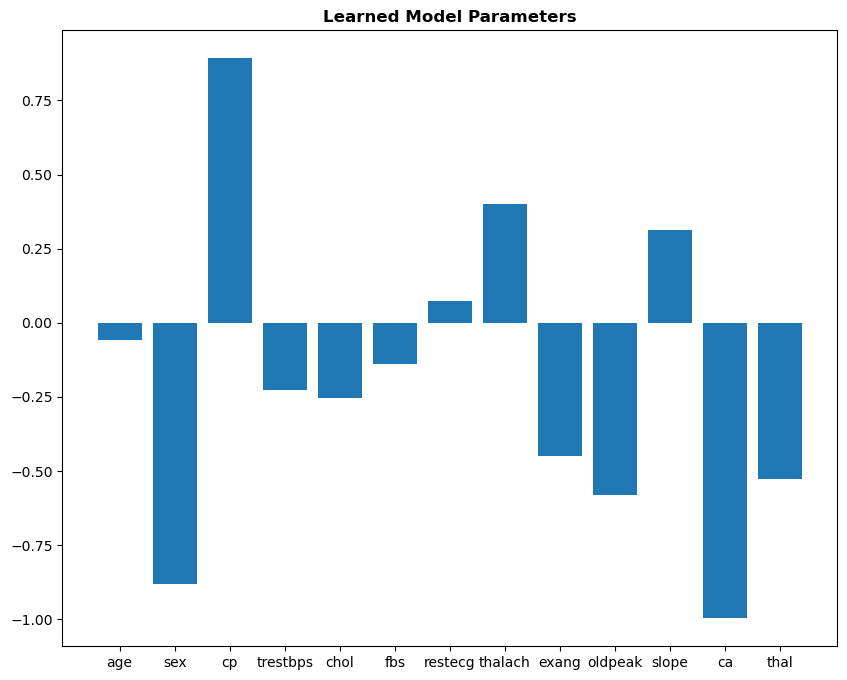

In [13]:
# Use the bar plot to visulaize the elements of the learned model parameter vector w
fig = plt.figure(1, [10, 8])
plt.bar(df.columns[:-1], clf.coef_[0], figure=fig)
plt.title('Learned Model Parameters', fontweight='heavy')

The larger the absolute value of the parameter, the larger of an impact it has on the prediction. CP (Chest Pain) and CA (Number of Major Vessels) have the highest absolute values. This makes sense because someone experiences chest pain is probably having a heart problem which is likely from a heart disease. Additionally if they have less than the typical number of major vessels, that is also probably from a disease. On the opposite end, fbs (fasting blood sugar) and restecg (resting electrocardiographic results) have very low values. Fasting Blood Sugar is used to find diabetes, not heart disease, so it makes sense that value is low. Resting Electrocardiographic Results measures your heartbeats. While this can be used to predict irregular heartbeats caused by disease, for the most part it is not related to heart disease.